In [ ]:
### This documnent countains the code required to fullfill my master thesis
### G. van der Plas

In [2]:
#import packages
import pandas as pd
import numpy as np
import os
from google.colab import drive

from shutil import copyfile
import shutil
import random

from tqdm import tqdm
import glob 


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import math
import csv

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers as L
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping


#import PIL
#import PIL.Image
#import pathlib
#from pathlib import Path
#import argparse

In [ ]:
print(tf.test.gpu_device_name())
!nvidia-smi
#!cat /proc/cpuinfo
# !cat /proc/meminfo

/device:GPU:0
Sun Jan  9 16:29:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    33W / 250W |    375MiB / 16280MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                          

# **UNZIP data locally in COLAB**

In [ ]:
!rm -rf  /content/__MACOSX
!rm -rf  /content/femaleset
!rm -rf  /content/maleset

In [ ]:
!rm -rf  /content/malesetsplit
!rm -rf  /content/femalesetsplit
!rm -rf  /content/malesetsplit
!rm -rf  /content/femalesetsplit
!rm -rf  /content/all_labels_male_corrected.csv
!rm -rf  /content/all_labels_male_test.csv
!rm -rf  /content/all_labels_male_val.csv
!rm -rf  /content/all_labels_male_val.csv

In [3]:
#mount drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#unzip
!unzip "/content/drive/MyDrive/Thesis_sep_2021/femaleset.zip" > /dev/null
!unzip "/content/drive/MyDrive/Thesis_sep_2021/maleset.zip"  > /dev/null

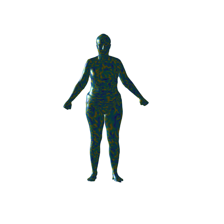

In [ ]:
#check if unzip is succesfull
imgfemale = tf.keras.preprocessing.image.load_img('/content/femaleset/SPRING0014/SPRING0014-D7-V0-H160.png')
imgfemale

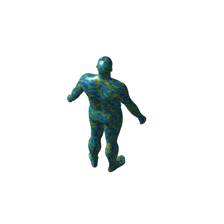

In [ ]:
imgmale = tf.keras.preprocessing.image.load_img('/content/maleset/SPRING0007/SPRING0007-D7-V40-H320.png')
imgmale

## **Separate into train and test**

In [ ]:
#list all model names
maleimg = os.listdir("/content/maleset")
femaleimg = os.listdir("/content/femaleset")

In [ ]:
#print all model names of male models
print("model names and lenght of male models:")
print(maleimg)
print(len(maleimg))
print(" ")

#print all model names of female models
print("model names and lenght of female models:")
print(femaleimg)
print(len(femaleimg))

model names and lenght of male models:
['SPRING0282', 'SPRING1933', 'SPRING1065', 'SPRING2515', 'SPRING2645', 'SPRING1326', 'SPRING2676', 'SPRING0505', 'SPRING0660', 'SPRING1404', 'SPRING2052', 'SPRING2718', 'SPRING1900', 'SPRING4633', 'SPRING1966', 'SPRING0167', 'SPRING4650', 'SPRING1583', 'SPRING0205', 'SPRING4182', 'SPRING0237', 'SPRING0164', 'SPRING1698', 'SPRING0128', 'SPRING2432', 'SPRING1444', 'SPRING4233', 'SPRING2406', 'SPRING1756', 'SPRING0029', 'SPRING0144', 'SPRING1597', 'SPRING0002', 'SPRING1488', 'SPRING0245', 'SPRING2467', 'SPRING0559', 'SPRING4381', 'SPRING0557', 'SPRING0618', 'SPRING4579', 'SPRING2778', 'SPRING2615', 'SPRING4138', 'SPRING1588', 'SPRING4768', 'SPRING4724', 'SPRING2936', 'SPRING4521', 'SPRING4611', 'SPRING4330', 'SPRING1075', 'SPRING4132', 'SPRING4385', 'SPRING1395', 'SPRING0157', 'SPRING4065', 'SPRING0555', 'SPRING2474', 'SPRING1536', 'SPRING4068', 'SPRING1745', 'SPRING2648', 'SPRING1484', 'SPRING2831', 'SPRING1656', 'SPRING0435', 'SPRING4338', 'SPRING4

In [ ]:
##
'''
Total images should be dividable by 10 otherwise the test will not work
'''
##

#Randomize and split models random over train and test
import random
random.seed(2130)
random.shuffle(maleimg)
random.shuffle(femaleimg)

##subset male 
#define subset
maleimgsubset = maleimg[:800]

#define train/val/test male
train_datamale = maleimgsubset[:600]
val_datamale = maleimgsubset[600:700]
test_datamale = maleimgsubset[700:]

##subset female 
#define subset
femaleimgsubset = femaleimg[:800]

#define train/val/test female
train_datafemale = femaleimgsubset[:600]
val_datafemale = femaleimgsubset[600:700]
test_datafemale = femaleimgsubset[700:]

In [ ]:
##
'''
Total images should be dividable by 10 otherwise the test will not work
'''
##

#check if succesfull for male
print(train_datamale)
print(val_datamale)
print(test_datamale)
print("number off male models in train = "+str(len(train_datamale)))
print("number off male models in val = "+str(len(val_datamale)))
print("number off male models in test = "+str(len(test_datamale)))
print("total number off male models is = "+str(len(test_datamale)+len(val_datamale)+len(train_datamale)))

print(" ")

#check if succesfull for female
print(train_datafemale)
print(val_datafemale)
print(test_datafemale)
print("number off female models in train = "+str(len(train_datafemale)))
print("number off female models in val = "+str(len(val_datafemale)))
print("number off female models in test = "+str(len(test_datafemale)))
print("total number off female models is = "+str(len(test_datafemale)+len(val_datafemale)+len(train_datafemale)))

['SPRING4743', 'SPRING1665', 'SPRING2752', 'SPRING1707', 'SPRING2998', 'SPRING2596', 'SPRING4138', 'SPRING2679', 'SPRING0108', 'SPRING2296', 'SPRING1439', 'SPRING1257', 'SPRING4478', 'SPRING1980', 'SPRING1482', 'SPRING0405', 'SPRING0152', 'SPRING2252', 'SPRING2396', 'SPRING4571', 'SPRING1036', 'SPRING0390', 'SPRING1511', 'SPRING4025', 'SPRING3012', 'SPRING4583', 'SPRING2709', 'SPRING4220', 'SPRING1075', 'SPRING4373', 'SPRING2299', 'SPRING2921', 'SPRING4112', 'SPRING2839', 'SPRING0512', 'SPRING1988', 'SPRING2831', 'SPRING4651', 'SPRING2428', 'SPRING2634', 'SPRING0285', 'SPRING0211', 'SPRING4048', 'SPRING1243', 'SPRING0580', 'SPRING1635', 'SPRING1052', 'SPRING1159', 'SPRING4692', 'SPRING0524', 'SPRING4375', 'SPRING1154', 'SPRING2695', 'SPRING2506', 'SPRING0595', 'SPRING2875', 'SPRING2881', 'SPRING2860', 'SPRING0431', 'SPRING0442', 'SPRING1330', 'SPRING1987', 'SPRING2591', 'SPRING0538', 'SPRING0198', 'SPRING0024', 'SPRING2376', 'SPRING2279', 'SPRING2892', 'SPRING0295', 'SPRING1577', 'SPRI

In [ ]:
#'SPRING0086' in train_datafemale
#train_datafemale.append('SPRING0086')

In [ ]:
##
'''
Total images should be dividable by 10 otherwise the test will not work
'''
##
## create train test split for both male and female models
#male train
destination_pathtrainmale = "/content/malesetsplit/train"
os.makedirs(destination_pathtrainmale)
#male val
destination_pathvalmale = "/content/malesetsplit/val"
os.makedirs(destination_pathvalmale)
#male test
destination_pathtestmale = "/content/malesetsplit/test"
os.makedirs(destination_pathtestmale)

#female train
destination_pathtrainfemale = "/content/femalesetsplit/train"
os.makedirs(destination_pathtrainfemale)
#female val
destination_pathvalfemale = "/content/femalesetsplit/val"
os.makedirs(destination_pathvalfemale)
#female test
destination_pathtestfemale = "/content/femalesetsplit/test"
os.makedirs(destination_pathtestfemale)

In [ ]:
original = r'/content/femaleset/SPRING0078/SPRING0086'
target = r'/content/femaleset'

shutil.move(original,target)

'/content/femaleset/SPRING0086'

In [ ]:
## create trainlabels for males and females


#train male
for trainlabel in train_datamale:
  pattern = "/content/maleset/"+trainlabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathtrainmale)

#val male
for vallabel in val_datamale:
  pattern = "/content/maleset/"+vallabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathvalmale)

#test male
for testlabel in test_datamale:
  pattern = "/content/maleset/"+testlabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathtestmale)




#train female
for trainlabel in train_datafemale:
  pattern = "/content/femaleset/"+trainlabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathtrainfemale)


#val female
for vallabel in val_datafemale:
  pattern = "/content/femaleset/"+vallabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathvalfemale)

#test female
for testlabel in test_datafemale:
  pattern = "/content/femaleset/"+testlabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathtestfemale)

In [ ]:
#check for male
print("male")
maleimgtrain = os.listdir("/content/malesetsplit/train")
maleimgval = os.listdir("/content/malesetsplit/val")
maleimgtest = os.listdir("/content/malesetsplit/test")
print(len(maleimgtrain))
print(len(maleimgval))
print(len(maleimgtest))
print(len(maleimgtrain)/185)
print(len(maleimgval)/185)
print(len(maleimgtest)/185)

print(" ")

#check for female
print("female")
femaleimgtrain = os.listdir("/content/femalesetsplit/train")
femaleimgval = os.listdir("/content/femalesetsplit/val")
femaleimgtest = os.listdir("/content/femalesetsplit/test")
print(len(femaleimgtrain))
print(len(femaleimgval))
print(len(femaleimgtest))
print(len(femaleimgtrain)/185)
print(len(femaleimgval)/185)
print(len(femaleimgtest)/185)


male
111000
18500
18500
600.0
100.0
100.0
 
female
111000
18500
18500
600.0
100.0
100.0


# **Loading principal components and create data generators**

In [4]:
# load principal components
## female principal components
df1=pd.read_excel("/content/drive/MyDrive/Thesis_sep_2021/FemalePCs.xlsx")

## male principa components
df2=pd.read_excel("/content/drive/MyDrive/Thesis_sep_2021/MalePCs.xlsx")

In [ ]:
print(df1.head())
print(df2.head())

         Filename      PC 1      PC 2  ...      PC 9      PC10     
0  SPRING0001.obj  8.120067 -0.261363  ... -0.363386 -0.408759  NaN
1  SPRING0014.obj -2.723997  0.760398  ... -0.127238  0.925548     
2  SPRING0015.obj -4.214653 -0.922275  ... -0.718815 -0.289657     
3  SPRING0017.obj -3.685222  1.550137  ... -0.022902  0.256028     
4  SPRING0052.obj -4.566391 -1.113222  ...  0.304093  0.908402     

[5 rows x 12 columns]
         Filename      PC 1      PC 2  ...      PC 9      PC10   
0  SPRING0001.obj  8.120067 -0.261363  ... -0.363386 -0.408759   
1  SPRING0002.obj  4.453033 -1.078755  ... -0.213788  0.168963   
2  SPRING0007.obj -2.934991 -1.339783  ... -0.713374  0.244707   
3  SPRING0008.obj  4.353720  0.189972  ...  1.220515  0.100544   
4  SPRING0009.obj -0.778509 -0.409938  ...  0.358052  0.529252   

[5 rows x 12 columns]


In [6]:
print('male'+ str(df2.mean()))
print('female'+ str(df1.mean()))

print('male'+ str(df2.var()))
print('female'+ str(df1.var()))

male PC 1   -3.955174e-09
 PC 2   -7.251154e-09
 PC 3    3.295979e-09
 PC 4   -1.186552e-08
 PC 5    5.932762e-09
 PC 6   -6.591958e-09
 PC 7   -1.384311e-08
 PC 8    7.910349e-09
 PC 9   -6.591958e-09
 PC10    1.977587e-09
dtype: float64
female PC 1    0.005300
 PC 2   -0.000171
 PC 3   -0.003023
 PC 4   -0.002770
 PC 5    0.000816
 PC 6    0.000652
 PC 7    0.000678
 PC 8    0.000155
 PC 9   -0.000237
 PC10   -0.000267
dtype: float64
male PC 1    33.282292
 PC 2     4.929390
 PC 3     2.200926
 PC 4     1.892179
 PC 5     0.910896
 PC 6     0.813812
 PC 7     0.683800
 PC 8     0.555304
 PC 9     0.397770
 PC10     0.387494
dtype: float64
female PC 1    27.282219
 PC 2     4.109531
 PC 3     2.672154
 PC 4     1.883182
 PC 5     0.878099
 PC 6     0.839379
 PC 7     0.616352
 PC 8     0.595511
 PC 9     0.408717
 PC10     0.343462
dtype: float64


In [ ]:
l1male=os.listdir("/content/malesetsplit/train")
l2male=os.listdir("/content/malesetsplit/val") 
l3male=os.listdir("/content/malesetsplit/test")

l1female=os.listdir("/content/femalesetsplit/train")
l2female=os.listdir("/content/femalesetsplit/val")
l3female=os.listdir("/content/femalesetsplit/test")


In [ ]:
# Name list creation
namem=[]
namefm=[]

for i in range(len(df1)):
  namefm.append(df1.Filename.iloc[i][:10])

for i in range(len(df2)):
  namem.append(df2.Filename.iloc[i][:10])

In [ ]:
print(namefm)

['SPRING0001', 'SPRING0014', 'SPRING0015', 'SPRING0017', 'SPRING0052', 'SPRING0053', 'SPRING0054', 'SPRING0055', 'SPRING0056', 'SPRING0060', 'SPRING0064', 'SPRING0065', 'SPRING0067', 'SPRING0069', 'SPRING0070', 'SPRING0072', 'SPRING0074', 'SPRING0075', 'SPRING0076', 'SPRING0078', 'SPRING0083', 'SPRING0084', 'SPRING0086', 'SPRING0087', 'SPRING0089', 'SPRING0090', 'SPRING0092', 'SPRING0093', 'SPRING0094', 'SPRING0095', 'SPRING0096', 'SPRING0097', 'SPRING0099', 'SPRING0104', 'SPRING0113', 'SPRING0114', 'SPRING0115', 'SPRING0116', 'SPRING0118', 'SPRING0119', 'SPRING0121', 'SPRING0125', 'SPRING0127', 'SPRING0134', 'SPRING0136', 'SPRING0143', 'SPRING0158', 'SPRING0160', 'SPRING0161', 'SPRING0163', 'SPRING0166', 'SPRING0174', 'SPRING0175', 'SPRING0176', 'SPRING0182', 'SPRING0183', 'SPRING0185', 'SPRING0189', 'SPRING0192', 'SPRING0195', 'SPRING0203', 'SPRING0208', 'SPRING0210', 'SPRING0213', 'SPRING0214', 'SPRING0216', 'SPRING0219', 'SPRING0222', 'SPRING0224', 'SPRING0225', 'SPRING0226', 'SPRI

In [ ]:
list(set(test_datafemale) - set(namefm))

[]

In [ ]:
# creating dictionary train male
dm1={}
dfm2={}

for i in tqdm(range(len(l1male))):
  if l1male[i][:10] in namem:
    dm1[l1male[i]]=np.asarray(df2.iloc[namem.index(l1male[i][:10])][1:11])
  
  
for i in tqdm(range(len(l1female))):
  if l1female[i][:10] in namefm:
    dfm2[l1female[i]]=np.asarray(df1.iloc[namefm.index(l1female[i][:10])][1:11])


100%|██████████| 111000/111000 [00:22<00:00, 4871.55it/s]


In [ ]:
# creating dictionary val male
dvm1={}
dvfm2={}

for i in tqdm(range(len(l2male))):
  if l2male[i][:10] in namem:
    dvm1[l2male[i]]=np.asarray(df2.iloc[namem.index(l2male[i][:10])][1:11])

for i in tqdm(range(len(l2female))):
  if l2female[i][:10] in namefm:
    dvfm2[l2female[i]]=np.asarray(df1.iloc[namefm.index(l2female[i][:10])][1:11])

100%|██████████| 18500/18500 [00:03<00:00, 5003.73it/s]


In [ ]:
# creating dictionary test male
dtm1={}
dtfm2={}

for i in tqdm(range(len(l3male))):
  if l3male[i][:10] in namem:
    dtm1[l3male[i]]=np.asarray(df2.iloc[namem.index(l3male[i][:10])][1:11])

for i in tqdm(range(len(l3female))):
  if l3female[i][:10] in namefm:
    dtfm2[l3female[i]]=np.asarray(df1.iloc[namefm.index(l3female[i][:10])][1:11])



100%|██████████| 18500/18500 [00:03<00:00, 4694.10it/s]


In [ ]:
preprocessedF=pd.DataFrame.from_dict(dfm2,orient='index')
preprocessedM=pd.DataFrame.from_dict(dm1,orient='index')

In [ ]:
preprocessedvalF=pd.DataFrame.from_dict(dvfm2,orient='index')
preprocessedvalM=pd.DataFrame.from_dict(dvm1,orient='index')

In [ ]:
print(len(dtfm2))

18500


In [ ]:
preprocessedtestF=pd.DataFrame.from_dict(dtfm2,orient='index')
preprocessedtestM=pd.DataFrame.from_dict(dtm1,orient='index')

In [ ]:
print(len(preprocessedF))
print(len(preprocessedM))
print(len(preprocessedvalF))
print(len(preprocessedvalM))
print(len(preprocessedtestF))
print(len(preprocessedtestM))

111000
111000
18500
18500
18500
18500


In [ ]:
preprocessedF["name"]=preprocessedF.index
preprocessedM["name"]=preprocessedM.index
preprocessedvalF["name"]=preprocessedvalF.index
preprocessedvalM["name"]=preprocessedvalM.index

preprocessedtestF["name"]=preprocessedtestF.index
preprocessedtestM["name"]=preprocessedtestM.index

In [ ]:
print(preprocessedM.head())
print(preprocessedvalM.head())
print(preprocessedtestM.head())

                                    0  ...                        name
SPRING1211-D7-V0-H90.png     0.763681  ...    SPRING1211-D7-V0-H90.png
SPRING2661-D7-V20-H200.png  -8.113312  ...  SPRING2661-D7-V20-H200.png
SPRING4059-D7-V20-H200.png  -9.732271  ...  SPRING4059-D7-V20-H200.png
SPRING4060-D7-V10-H250.png -11.474185  ...  SPRING4060-D7-V10-H250.png
SPRING2050-D7-V10-H290.png -10.062367  ...  SPRING2050-D7-V10-H290.png

[5 rows x 11 columns]
                                   0  ...                        name
SPRING0661-D7-V20-H50.png   6.453628  ...   SPRING0661-D7-V20-H50.png
SPRING0238-D7-V20-H240.png  1.310134  ...  SPRING0238-D7-V20-H240.png
SPRING0443-D7-V40-H280.png  0.695070  ...  SPRING0443-D7-V40-H280.png
SPRING1571-D7-V40-H210.png -1.936703  ...  SPRING1571-D7-V40-H210.png
SPRING2003-D7-V20-H290.png -0.901891  ...  SPRING2003-D7-V20-H290.png

[5 rows x 11 columns]
                                   0  ...                        name
SPRING0578-D7-V40-H290.png  2.075947  

In [ ]:
preprocessedF.reset_index(inplace=True)
preprocessedM.reset_index(inplace=True)
preprocessedvalF.reset_index(inplace=True)
preprocessedvalM.reset_index(inplace=True)

preprocessedtestF.reset_index(inplace=True)
preprocessedtestM.reset_index(inplace=True)

In [ ]:
preprocessedF.drop(columns=["index"],inplace=True)
preprocessedM.drop(columns=["index"],inplace=True)
preprocessedvalF.drop(columns=["index"],inplace=True)
preprocessedvalM.drop(columns=["index"],inplace=True)

preprocessedtestF.drop(columns=["index"],inplace=True)
preprocessedtestM.drop(columns=["index"],inplace=True)

In [ ]:
preprocessedF.to_csv('all_labels_female_train_800.csv',index=False)
preprocessedM.to_csv('all_labels_male_train_800.csv',index=False)
preprocessedvalM.to_csv('all_labels_male_val_800.csv',index=False)
preprocessedvalF.to_csv('all_labels_female_val_800.csv',index=False)
preprocessedtestF.to_csv('all_labels_female_test_800.csv',index=False)
preprocessedtestM.to_csv('all_labels_male_test_800.csv',index=False)

In [ ]:
traindfmale = pd.read_csv('all_labels_male_train_800.csv') 
validdfmale = pd.read_csv('all_labels_male_val_800.csv')
testdfmale  = pd.read_csv('all_labels_male_test_800.csv')

traindffemale = pd.read_csv('all_labels_female_train_800.csv') 
validdffemale = pd.read_csv('all_labels_female_val_800.csv')
testdffemale = pd.read_csv('all_labels_female_test_800.csv')

In [ ]:
genderindexmale = [0,3]
genderindexfemale = [0,2]

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

train_generatormale=datagen.flow_from_dataframe(
    dataframe=traindfmale,
    directory='/content/malesetsplit/train',
    x_col='name',
    y_col=[str(genderindexmale[1])],
    batch_size=10,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224,448)
    )

valid_generatormale=datagen.flow_from_dataframe(
    dataframe=validdfmale,
    directory='/content/malesetsplit/val',
    x_col='name',
    y_col=[str(genderindexmale[1])],
    batch_size=10,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224,448)
    )

test_generatormale=datagen.flow_from_dataframe(
    dataframe=testdfmale,
    directory='/content/malesetsplit/test',
    x_col='name',
    y_col=[str(genderindexmale[1])],
    batch_size=10,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(224,448)
    )

Found 111000 validated image filenames.
Found 18500 validated image filenames.
Found 18500 validated image filenames.


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
    )

train_generatorfemale=datagen.flow_from_dataframe(
    dataframe=traindffemale,
    directory='/content/femalesetsplit/train',
    x_col='name',
    y_col=[str(genderindexfemale[1])],
    batch_size=10,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224,448)
    )

valid_generatorfemale=datagen.flow_from_dataframe(
    dataframe=validdffemale,
    directory='/content/femalesetsplit/val',
    x_col='name',
    y_col=[str(genderindexfemale[1])],
    batch_size=10,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224,448)
    )

test_generatorfemale=datagen.flow_from_dataframe(
    dataframe=testdffemale,
    directory='/content/femalesetsplit/test',
    x_col='name',
    y_col=[str(genderindexfemale[1])],
    batch_size=10,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(224,448)
    )

Found 111000 validated image filenames.
Found 18500 validated image filenames.
Found 18500 validated image filenames.


In [ ]:
male1name="male1name_800_INC_waist"
male2name="male2name_800"
female1name="female1name_RES_waist"
female2name="female2name"

In [ ]:
STEP_SIZE_TRAINmale=train_generatormale.n//train_generatormale.batch_size
STEP_SIZE_VALIDmale=valid_generatormale.n//valid_generatormale.batch_size
STEP_SIZE_TESTmale = test_generatormale.n// test_generatormale.batch_size

STEP_SIZE_TRAINfemale=train_generatorfemale.n//train_generatorfemale.batch_size
STEP_SIZE_VALIDfemale=valid_generatorfemale.n//valid_generatorfemale.batch_size
STEP_SIZE_TESTfemale = test_generatorfemale.n// test_generatorfemale.batch_size

# **Train and test**

In [ ]:
tf.keras.backend.clear_session()

#Importing the Resnet50 model is possible if the below is uncommented
model_fn=ResNet50(include_top=False, input_shape=(448,224,3),pooling='avg')

#model_fn=InceptionV3(include_top=False, input_shape=(448,224,3),pooling='avg')
model_fn.summary()


model=tf.keras.models.Sequential()
model.add(model_fn)

model.add(L.Dense(2,activation='linear'))
model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 448, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 454, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 224, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
#set hyperparamerts for learning rate, early stopping and checkpoints
rlr=ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.00001, min_delta=0.001)
ckpt=ModelCheckpoint('models/checkpoint_'+male1name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.0001)



#compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                loss='mean_squared_error',
                metrics=['mean_absolute_error'])


#fit the generator
history=model.fit_generator(generator=train_generatorfemale,
                           steps_per_epoch=STEP_SIZE_TRAINfemale,
                           validation_data=valid_generatorfemale,
                           validation_steps=STEP_SIZE_VALIDfemale,
                           validation_freq=1,
                           epochs=50,
                           callbacks=[rlr,ckpt,es]
                           )

# save weights
model.save_weights('/content/drive/MyDrive/Thesis_sep_2021/'+female1name+'.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
11100/11100 [==============================] - ETA: 0s - loss: 0.9782 - mean_absolute_error: 0.7814
Epoch 00001: val_loss improved from inf to 1087.01538, saving model to models/checkpoint_male1name_800_INC_waist
INFO:tensorflow:Assets written to: models/checkpoint_male1name_800_INC_waist/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11100/11100 [==============================] - 1496s 133ms/step - loss: 0.9782 - mean_absolute_error: 0.7814 - val_loss: 1087.0154 - val_mean_absolute_error: 32.9291 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 2/50
11100/11100 [==============================] - ETA: 0s - loss: 0.7043 - mean_absolute_error: 0.6679
Epoch 00002: val_loss improved from 1087.01538 to 47.68485, saving model to models/checkpoint_male1name_800_INC_waist
INFO:tensorflow:Assets written to: models/checkpoint_male1name_800_INC_waist/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11100/11100 [==============================] - 1479s 133ms/step - loss: 0.7043 - mean_absolute_error: 0.6679 - val_loss: 47.6849 - val_mean_absolute_error: 6.8435 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 3/50
11100/11100 [==============================] - ETA: 0s - loss: 0.5846 - mean_absolute_error: 0.6076
Epoch 00003: val_loss improved from 47.68485 to 1.37391, saving model to models/checkpoint_male1name_800_INC_waist
INFO:tensorflow:Assets written to: models/checkpoint_male1name_800_INC_waist/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11100/11100 [==============================] - 1483s 134ms/step - loss: 0.5846 - mean_absolute_error: 0.6076 - val_loss: 1.3739 - val_mean_absolute_error: 0.9465 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 4/50
11100/11100 [==============================] - ETA: 0s - loss: 0.5060 - mean_absolute_error: 0.5646
Epoch 00004: val_loss did not improve from 1.37391
11100/11100 [==============================] - 1462s 132ms/step - loss: 0.5060 - mean_absolute_error: 0.5646 - val_loss: 2.3511 - val_mean_absolute_error: 1.3156 - lr: 0.0010
Epoch 5/50
11100/11100 [==============================] - ETA: 0s - loss: 0.4361 - mean_absolute_error: 0.5235
Epoch 00005: val_loss did not improve from 1.37391
11100/11100 [==============================] - 1470s 132ms/step - loss: 0.4361 - mean_absolute_error: 0.5235 - val_loss: 519.7139 - val_mean_absolute_error: 22.7159 - lr: 0.0010
Epoch 6/50
11100/11100 [==============================] - ETA: 0s - loss: 0.3745 - mean_absolute_error: 0.4838
Epoch 00006: val_loss improved from 1.37391 to 1.18175, saving model to models/checkpoint_male1name_800_INC_waist
INFO:tensorflow:Assets written to: models/checkpoint_male1name_800_INC_waist/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11100/11100 [==============================] - 1500s 135ms/step - loss: 0.3745 - mean_absolute_error: 0.4838 - val_loss: 1.1817 - val_mean_absolute_error: 0.8961 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 7/50
11100/11100 [==============================] - ETA: 0s - loss: 0.3181 - mean_absolute_error: 0.4457
Epoch 00007: val_loss did not improve from 1.18175
11100/11100 [==============================] - 1466s 132ms/step - loss: 0.3181 - mean_absolute_error: 0.4457 - val_loss: 491.1574 - val_mean_absolute_error: 22.1339 - lr: 0.0010
Epoch 8/50
11100/11100 [==============================] - ETA: 0s - loss: 0.2661 - mean_absolute_error: 0.4068
Epoch 00008: val_loss did not improve from 1.18175
11100/11100 [==============================] - 1464s 132ms/step - loss: 0.2661 - mean_absolute_error: 0.4068 - val_loss: 1880.2333 - val_mean_absolute_error: 43.3245 - lr: 0.0010
Epoch 9/50
11100/11100 [==============================] - ETA: 0s - loss: 0.2204 - mean_absolute_error: 0.3698
Epoch 00009: val_loss did not improve from 1.18175
11100/11100 [==============================] - 1463s 132ms/step - loss: 0.2204 - mean_absolute_error: 0.3698 - val_loss: 4.9560 - val_mean_absolute_error: 1.

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11100/11100 [==============================] - 1491s 134ms/step - loss: 0.1805 - mean_absolute_error: 0.3352 - val_loss: 0.8637 - val_mean_absolute_error: 0.7409 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 11/50
11100/11100 [==============================] - ETA: 0s - loss: 0.1503 - mean_absolute_error: 0.3050
Epoch 00011: val_loss did not improve from 0.86373
11100/11100 [==============================] - 1464s 132ms/step - loss: 0.1503 - mean_absolute_error: 0.3050 - val_loss: 651.3736 - val_mean_absolute_error: 25.4632 - lr: 0.0010
Epoch 12/50
11100/11100 [==============================] - ETA: 0s - loss: 0.1257 - mean_absolute_error: 0.2790
Epoch 00012: val_loss did not improve from 0.86373
11100/11100 [==============================] - 1466s 132ms/step - loss: 0.1257 - mean_absolute_error: 0.2790 - val_loss: 257.6027 - val_mean_absolute_error: 16.0156 - lr: 0.0010
Epoch 13/50
11100/11100 [==============================] - ETA: 0s - loss: 0.1061 - mean_absolute_error: 0.2561
Epoch 00013: val_loss did not improve from 0.86373
11100/11100 [==============================] - 1467s 132ms/step - loss: 0.1061 - mean_absolute_error: 0.2561 - val_loss: 205.6671 - val_mean_absolute_error

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11100/11100 [==============================] - 1483s 134ms/step - loss: 0.0352 - mean_absolute_error: 0.1470 - val_loss: 0.6740 - val_mean_absolute_error: 0.6494 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 17/50
11100/11100 [==============================] - ETA: 0s - loss: 0.0229 - mean_absolute_error: 0.1193
Epoch 00017: val_loss improved from 0.67404 to 0.66802, saving model to models/checkpoint_male1name_800_INC_waist
INFO:tensorflow:Assets written to: models/checkpoint_male1name_800_INC_waist/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11100/11100 [==============================] - 1487s 134ms/step - loss: 0.0229 - mean_absolute_error: 0.1193 - val_loss: 0.6680 - val_mean_absolute_error: 0.6489 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 18/50
11100/11100 [==============================] - ETA: 0s - loss: 0.0178 - mean_absolute_error: 0.1053
Epoch 00018: val_loss did not improve from 0.66802
11100/11100 [==============================] - 1465s 132ms/step - loss: 0.0178 - mean_absolute_error: 0.1053 - val_loss: 0.6734 - val_mean_absolute_error: 0.6498 - lr: 1.0000e-04
Epoch 19/50
11100/11100 [==============================] - ETA: 0s - loss: 0.0145 - mean_absolute_error: 0.0952
Epoch 00019: val_loss did not improve from 0.66802
11100/11100 [==============================] - 1463s 132ms/step - loss: 0.0145 - mean_absolute_error: 0.0952 - val_loss: 0.6706 - val_mean_absolute_error: 0.6488 - lr: 1.0000e-04
Epoch 20/50
11100/11100 [==============================] - ETA: 0s - loss: 0.0120 - mean_absolute_error: 0.0871
Epoch 00020: val_loss did not improve from 0.66802
11100/11100 [==============================] - 1464s 132ms/step - loss: 0.0120 - mean_absolute_error: 0.0871 - val_loss: 0.6734 - val_mean_absolute_error

In [ ]:
test_generatorfemale.reset()

model_fn=ResNet50(include_top=False, input_shape=(448,224,3),pooling='avg')
model = model=tf.keras.models.Sequential()
model.add(model_fn)

model.add(L.Dense(2,activation='linear'))
model.load_weights('/content/drive/MyDrive/Thesis_sep_2021/female1name_RES_waist.h5')

predictions=model.predict(test_generatorfemale,
                                    steps=STEP_SIZE_TESTfemale,
                                    verbose = 1)
data = {'T2': testdffemale[str(genderindexfemale[1])],
        
        'P2': predictions[:,0],
        }
df = pd.DataFrame(data)

df.to_csv('/content/drive/MyDrive/Thesis_sep_2021/test_results_'+female1name+'.csv')

1850/1850 [==============================] - 73s 39ms/step


In [ ]:
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy'+female1name)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
female1=pd.read_csv("/content/drive/MyDrive/Thesis_sep_2021/test_results_"+female1name+".csv")

In [ ]:
female1.describe()

,Unnamed: 0,T1,P1
count,18500.000000,18500.000000,18500.000000
mean,9249.500000,-0.932183,-0.663782
std,5340.634326,5.042345,4.899133
min,0.000000,-15.655572,-12.809915
25%,4624.750000,-3.858575,-3.925097
50%,9249.500000,-1.868920,-1.179285
75%,13874.250000,2.037567,1.659510
max,18499.000000,14.260620,21.711624


In [ ]:
y_true2=(79.23/(5.042345))*female1["T1"]+1639.66

In [ ]:
y_pred2=(79.23/(5.042345))*female1["P1"]+1639.66

In [ ]:
print("MAE of female testing for height is ", mean_absolute_error(y_true2, y_pred2),"Millimeters")

MAE of female testing for height is  17.546292701248948 Millimeters


In [ ]:
waist_true2=2*math.pi*female1["T2"]
waist_pred2=2*math.pi*female1["P2"]
waist_true2.describe()

count    18500.000000
mean         0.999818
std          9.159629
min        -36.784362
25%         -3.297422
50%          2.349286
75%          6.949233
max         18.478823
Name: T2, dtype: float64

In [ ]:
w_true2=(134.89/(9.159629))*waist_true2+788.96
w_pred2=(134.89/(9.159629))*waist_pred2+788.96
print("MAE of female testing for waist in males is ", mean_absolute_error(w_true2, w_pred2),"Millimeters")

MAE of female testing for waist in males is  38.45981236859127 Millimeters


# **Baseline**

## PC1

In [ ]:
female1name="female1name_INC_height"

In [ ]:
female1=pd.read_csv("/content/drive/MyDrive/Thesis_sep_2021/test_results_"+female1name+".csv")

In [ ]:
traindffemale.describe()

In [ ]:
BasePC1list = [-0.127676 for i in range(len(female1))]
BasePC1 = pd.DataFrame(BasePC1list, columns =['PC1_mean_train'])

In [ ]:
y_true2=(79.23/(5.057424))*female1["T1"]+1639.66
y_pred2=(79.23/(5.057424))*BasePC1["PC1_mean_train"]+1639.66

In [ ]:
print("BASELINE PC1 feMale MAE testing for height is ", mean_absolute_error(y_true2, y_pred2),"Millimeters")

## PC2

In [ ]:
female1name="female1name_INC_waist"

In [ ]:
female1=pd.read_csv("/content/drive/MyDrive/Thesis_sep_2021/test_results_"+female1name+".csv")

In [ ]:
traindffemale.describe()

,0,1,2,3,4,5,6,7,8,9
count,110815.000000,110815.000000,110815.000000,110815.000000,110815.000000,110815.000000,110815.000000,110815.000000,110815.000000,110815.000000
mean,-0.127676,0.035737,0.022796,0.082719,-0.007989,-0.025292,0.023869,-0.002929,-0.049127,-0.008586
std,5.153255,1.993496,1.602630,1.337568,0.919775,0.881539,0.792749,0.744876,0.612208,0.601206
min,-14.968514,-7.234826,-7.382713,-4.932753,-3.006421,-2.484127,-2.614433,-2.622428,-2.334605,-2.075365
25%,-3.437440,-1.285926,-0.745023,-0.781182,-0.642244,-0.590854,-0.477633,-0.469910,-0.424685,-0.414779
50%,-0.305424,0.033722,0.244346,0.134666,-0.024207,-0.056969,0.000775,-0.009821,-0.047433,0.015206
75%,3.166344,1.269185,1.031867,0.988484,0.597247,0.499458,0.482657,0.464264,0.327990,0.404282
max,16.977782,8.296145,3.590279,3.853229,3.034569,3.125444,3.462074,3.261618,1.794208,2.009046


In [ ]:
BasePC1list = [0.022796 for i in range(len(female1))]
BasePC1 = pd.DataFrame(BasePC1list, columns =['PC3_mean_train'])

In [ ]:
waist_true2=2*math.pi*female1["T2"]
waist_pred2=2*math.pi*BasePC1["PC3_mean_train"]
waist_true2.describe()

count    18500.000000
mean        -1.290387
std         11.535664
min        -42.440642
25%         -7.111124
50%          0.491625
75%          7.877410
max         15.719047
Name: T2, dtype: float64

In [ ]:
w_true2=(134.89/(11.535664))*waist_true2+788.96
w_pred2=(134.89/(11.535664))*waist_pred2+788.96
print("BASELINE PC3 FEMale MAE of male testing for waist in males is ", mean_absolute_error(w_true2, w_pred2),"Millimeters")

BASELINE PC3 FEMale MAE of male testing for waist in males is  105.95673289738669 Millimeters
